<a href="https://colab.research.google.com/github/chakshudeep/Stock_Market_Growth_Prediction_Using_Deep_Learning_Algorithm/blob/main/StockMarketGrowthPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math

In [2]:
df=pdr.get_data_tiingo('AAPL',api_key='9ddeed86010071097a5d2d76b6118a109fed45ee')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-07-17 00:00:00+00:00,149.56,150.90,148.57,148.82,23243713,35.389423,35.706498,35.155165,35.214321,92974852,0.0,1.0
1,AAPL,2017-07-18 00:00:00+00:00,150.08,150.13,148.67,149.20,17713795,35.512467,35.524298,35.178828,35.304238,70855180,0.0,1.0
2,AAPL,2017-07-19 00:00:00+00:00,151.02,151.42,149.95,150.48,20615419,35.734893,35.829543,35.481706,35.607116,82461676,0.0,1.0
3,AAPL,2017-07-20 00:00:00+00:00,150.34,151.74,150.19,151.50,17053326,35.573989,35.905262,35.538496,35.848473,68213304,0.0,1.0
4,AAPL,2017-07-21 00:00:00+00:00,150.27,150.44,148.88,149.99,24671002,35.557426,35.597652,35.228519,35.491171,98684008,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-07-07 00:00:00+00:00,146.35,146.55,143.2800,143.290,66253709,146.35,146.55,143.2800,143.290,66253709,0.0,1.0
1253,AAPL,2022-07-08 00:00:00+00:00,147.04,147.55,145.0000,145.265,64547798,147.04,147.55,145.0000,145.265,64547798,0.0,1.0
1254,AAPL,2022-07-11 00:00:00+00:00,144.87,146.64,143.7800,145.670,63305113,144.87,146.64,143.7800,145.670,63305113,0.0,1.0
1255,AAPL,2022-07-12 00:00:00+00:00,145.86,148.45,145.0500,145.760,77588759,145.86,148.45,145.0500,145.760,77588759,0.0,1.0
1256,AAPL,2022-07-13 00:00:00+00:00,145.49,146.45,142.1201,142.990,71185560,145.49,146.45,142.1201,142.990,71185560,0.0,1.0


In [5]:
df1=df.reset_index()['close']
df1.shape
df1

0       149.56
1       150.08
2       151.02
3       150.34
4       150.27
         ...  
1252    146.35
1253    147.04
1254    144.87
1255    145.86
1256    145.49
Name: close, Length: 1257, dtype: float64

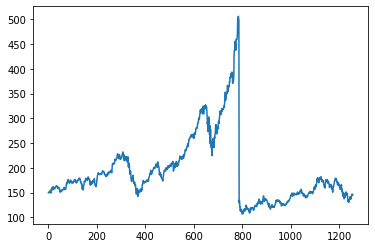

In [6]:
plt.plot(df1)

In [7]:
#transforming the data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1257, 1)

In [8]:
df1

array([[0.10700063],
       [0.10830307],
       [0.11065748],
       ...,
       [0.0952536 ],
       [0.09773325],
       [0.09680651]])

In [9]:
#splitting datset into train and test data
training_size=int(len(df1)*0.65)
testing_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
len(train_data),len(test_data)

(817, 440)

In [11]:
 #converting array of values into a dataset matrix
 import numpy
 def create_dataset(dataset,time_step=1):
   dataX, dataY=[], []
   for i in range(len(dataset)-time_step-1):
     a=dataset[i:(i+time_step),0]
     dataX.append(a)
     dataY.append(dataset[i+time_step,0])
   return numpy.array(dataX),numpy.array(dataY)

In [12]:
#reshaping the data as X=t,t+1,t+2 and Y=t+4
time_step=100
X_train, Y_train= create_dataset(train_data, time_step)
X_test, Y_test= create_dataset(test_data, time_step)

In [13]:
print(X_train.shape) ,print(Y_train.shape)

(716, 100)
(716,)


(None, None)

In [14]:
print(X_test.shape), print(Y_test.shape)

(339, 100)
(339,)


(None, None)

In [15]:
#reshaping data for LSTM in 3D [samples,time_steps,features]
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [16]:
#creating our Staxked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 20s 674ms/step - loss: 0.0465 - val_loss: 0.0040
Epoch 2/100
12/12 [==============================] - 4s 310ms/step - loss: 0.0132 - val_loss: 0.0029
Epoch 3/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0103 - val_loss: 0.0017
Epoch 4/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0105 - val_loss: 4.4529e-04
Epoch 5/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0083 - val_loss: 4.1623e-04
Epoch 6/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0073 - val_loss: 5.6340e-04
Epoch 7/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0065 - val_loss: 5.0860e-04
Epoch 8/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0057 - val_loss: 5.1359e-04
Epoch 9/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0055 - val_loss: 3.1758e-04
Epoch 10/100
12/12 [==============================] - 2s 183ms/ste

In [19]:
#prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [20]:
#transform back to original form----inverse tranformation
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
#RMSE performance metrics
#train data RMSE
math.sqrt(mean_squared_error(Y_train,train_predict))

236.73274551756265

In [22]:
#test data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

154.43734919609545

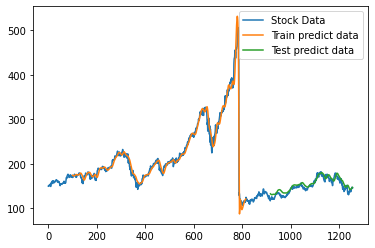

In [25]:
#plotting the growth

#shifting train for plotting
import numpy
lookback=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[lookback:len(train_predict)+lookback,:]=train_predict

#shfting test for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(lookback*2)+1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1),label='Stock Data')
plt.plot(trainPredictPlot,label='Train predict data')
plt.plot(testPredictPlot,label='Test predict data')
plt.legend()
plt.show()

In [26]:
len(test_data)

440

In [27]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.15539135879774574,
 0.15143393863494048,
 0.14396994364433308,
 0.13332498434564805,
 0.14001252348152782,
 0.14529743268628675,
 0.14597370068879145,
 0.14116468378209135,
 0.14958046336881647,
 0.1487539135879774,
 0.14108954289292414,
 0.13139636819035688,
 0.1267376330619912,
 0.1405385097056981,
 0.12944270507201,
 0.11994990607388845,
 0.10965560425798371,
 0.12085159674389478,
 0.13212273011897302,
 0.13470256731371316,
 0.14311834690043823,
 0.14662492172824038,
 0.1552410770194113,
 0.1587226048841578,
 0.16839073262366933,
 0.17001878522229175,
 0.17222291797119593,
 0.18063869755792106,
 0.1776581089542893,
 0.16974326862867878,
 0.16899185973700687,
 0.1793362554790231,
 0.17087038196618654,
 0.16278021289918598,
 0.1635566687539135,
 0.158422041327489,
 0.14755165936130238,
 0.1523356293049467,
 0.15919849718221663,
 0.14639949906073885,
 0.1458484658735128,
 0.15168440826549778,
 0.15125860989355033,
 0.14922980588603624,
 0.13763306199123349,
 0.140363180964308,
 0.12

In [30]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10413055]
101
1 day input [0.15143394 0.14396994 0.13332498 0.14001252 0.14529743 0.1459737
 0.14116468 0.14958046 0.14875391 0.14108954 0.13139637 0.12673763
 0.14053851 0.12944271 0.11994991 0.1096556  0.1208516  0.13212273
 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073
 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186
 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166
 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861
 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675
 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688
 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175
 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742
 0.08435817 0.09252348 0.107201   0.10519724 0.10487163 0.11113338
 0.096531   0.09843456 0.10487163 0.10299311 0.08966813 0.07586725
 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 

In [31]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [32]:
len(df1)

1257

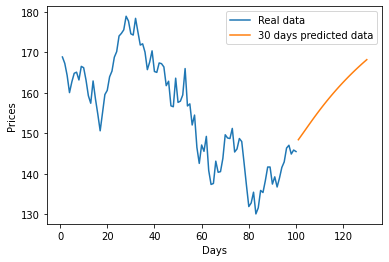

In [35]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]),label='Real data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='30 days predicted data')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()

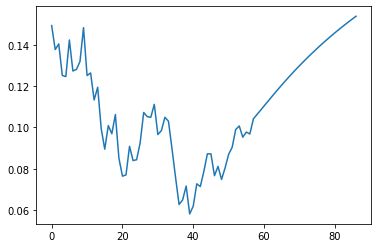

In [36]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

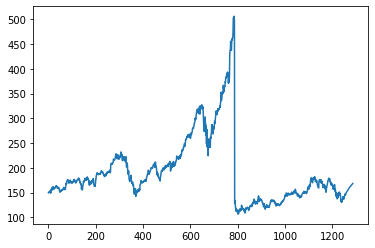

In [37]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)